----------
属于：Non-linear Activations(weighted sum, nonlinearity)
----------

-----------------

学习：

1、ReLU:https://docs.pytorch.org/docs/stable/generated/torch.nn.ReLU.html
参数：input；
inplace=True/False 是否更改input（通常采用False来保护原始数据，default也是False）
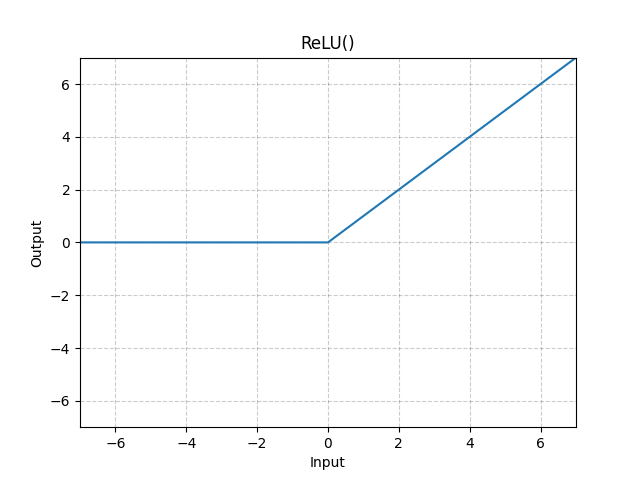

2、sigmoid:   https://docs.pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html

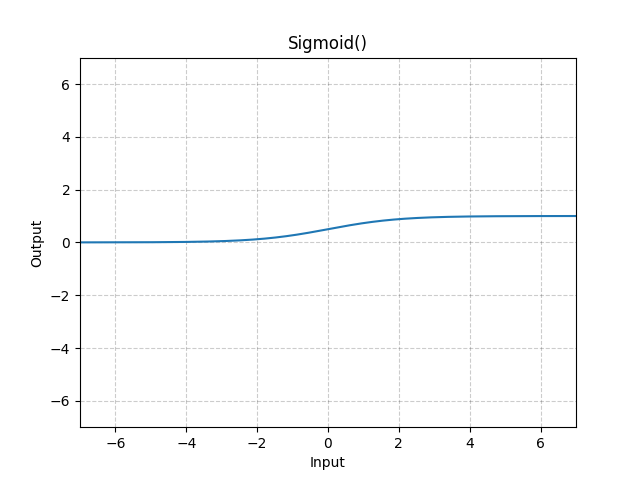

In [5]:
import torch
from torch import nn

In [ ]:
input = torch.tensor([[1, -0.5],
                      [-1, 3.0]])
input = torch.reshape(input, (-1, 1, 2, 2))
# print(output.shape)

torch.Size([1, 1, 2, 2])


In [ ]:
class Tudui(nn.Module):
    def __init__(self):
        super(Tudui, self).__init__()
        self.relu = nn.ReLU(inplace = False)

    def forward(self, input):
        output = self.relu(input)
        return output

In [ ]:
tudui = Tudui()
output = tudui(input)
print(output)

tensor([[1., 0.],
        [0., 3.]])


--------------------------------下面测试sigmoid--------------------------------------


In [12]:
import torchvision

dataset = torchvision.datasets.CIFAR10(root = "../data", train=False, download=True, transform=torchvision.transforms.ToTensor())

from torch.utils.data import DataLoader
dataloader = DataLoader(dataset, batch_size=64)

In [13]:
class Tudui_fors(nn.Module):
    def __init__(self):
        super(Tudui_fors, self).__init__()
        self.sigmoid = nn.Sigmoid()

    def forward(self, input):
        output = self.sigmoid(input)
        return output

In [15]:
tudui_fors = Tudui_fors() #创建实例

from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter(log_dir="logs/Sigmoid")
step = 0
for data in dataloader:
    imgs, targets = data
    output = tudui_fors(imgs)
    writer.add_images("input", imgs, step)
    writer.add_images("output", output, step)
    step += 1

writer.close()
